In [1]:
library(tidyverse) 
library(ggplot2)
auto <- read_csv("../input/automobile_price_binary.csv")

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.1.9000     ✔ purrr   0.3.2     
✔ tibble  2.1.3          ✔ dplyr   0.8.3     
✔ tidyr   1.0.0          ✔ stringr 1.4.0     
✔ readr   1.3.1          ✔ forcats 0.4.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Parsed with column specification:
cols(
  .default = col_double(),
  make = col_character(),
  fuel.type = col_character(),
  aspiration = col_character(),
  num.of.doors = col_character(),
  body.style = col_character(),
  drive.wheels = col_character(),
  engine.location = col_character(),
  engine.type = col_character(),
  num.of.cylinders = col_character(),
  fuel.system = col_character(),
  price = col_character()
)

See spec(...) for full column specifications.



In [3]:
auto<-filter(auto, fuel.system != "mfi")
head(auto)

symboling,make,fuel.type,aspiration,num.of.doors,body.style,drive.wheels,engine.location,wheel.base,length,⋯,engine.size,fuel.system,bore,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg,price
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,⋯,130,mpfi,3.47,2.68,9.0,111,5000,21,27,high
3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,⋯,130,mpfi,3.47,2.68,9.0,111,5000,21,27,high
1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,⋯,152,mpfi,2.68,3.47,9.0,154,5000,19,26,high
2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,⋯,109,mpfi,3.19,3.40,10.0,102,5500,24,30,high
2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,⋯,136,mpfi,3.19,3.40,8.0,115,5500,18,22,high
2,audi,gas,std,two,sedan,fwd,front,99.8,177.3,⋯,136,mpfi,3.19,3.40,8.5,110,5500,19,25,high


**Numerical items**

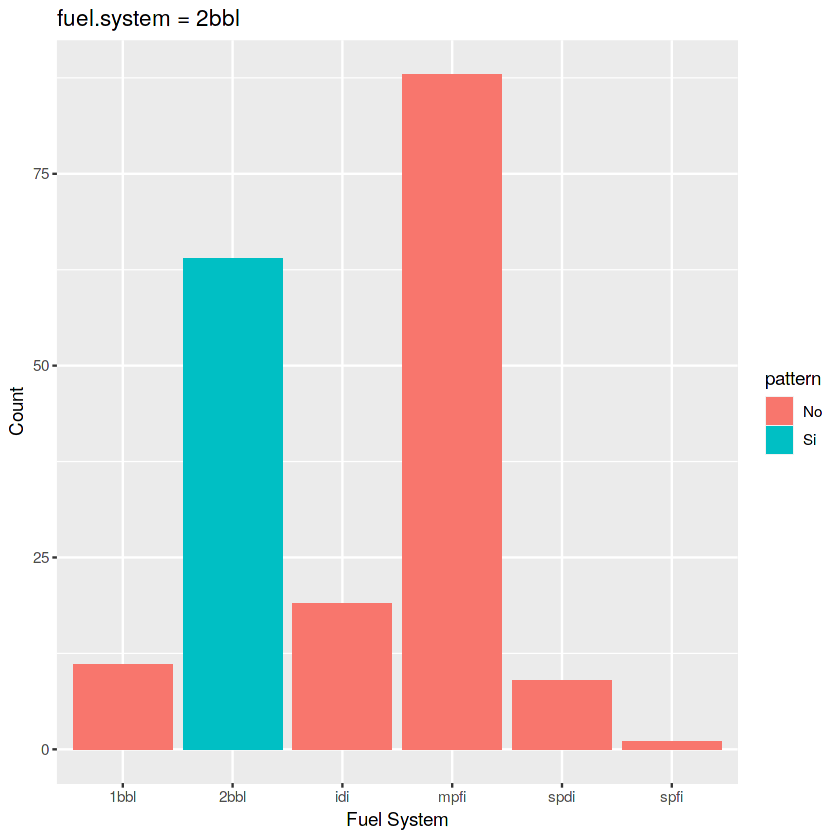

In [5]:
# 1 Item
auto$pattern <- ifelse(auto$fuel.system == '2bbl', "Si", 'No')
ggplot(auto, aes(x = fuel.system, fill = pattern)) + 
    geom_bar() + #draw the bars for a bar chart
    ggtitle("fuel.system = 2bbl") +
    labs(x = "Fuel System",y = "Count", fill = "pattern")


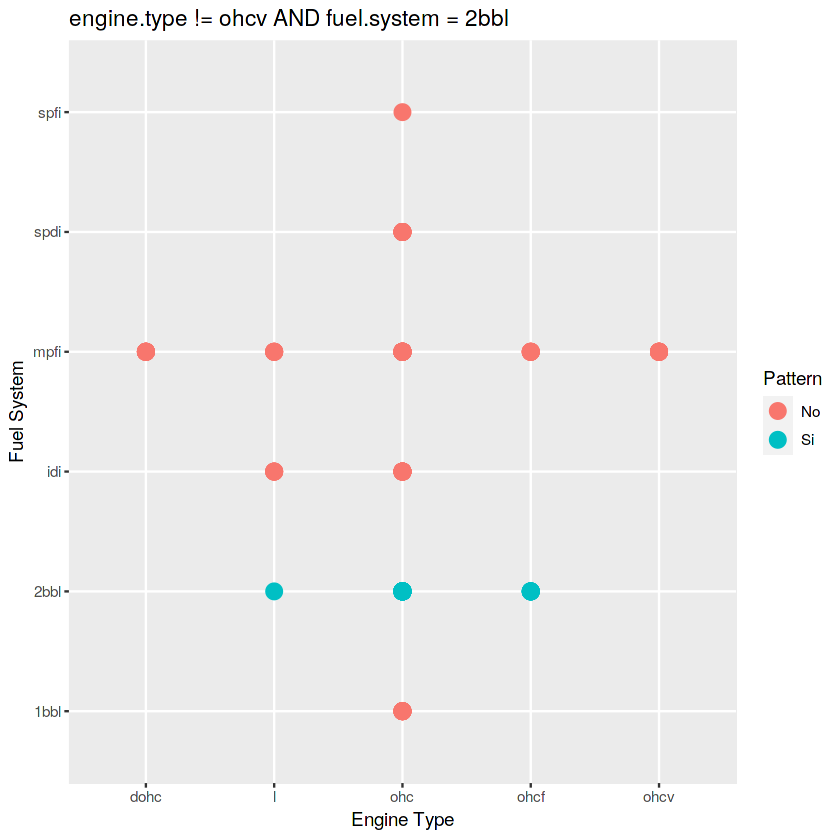

In [6]:
# 2 Item
auto$pattern <- ifelse(auto$engine.type != 'ohcv' & auto$fuel.system == '2bbl', "Si", 'No')
ggplot(auto, aes(x = engine.type , y =fuel.system, col = pattern)) + 
geom_point(size = 4, alpha = 1) + 
  ggtitle("engine.type != ohcv AND fuel.system = 2bbl")+
labs(y = "Fuel System",color = "Pattern", x = "Engine Type")

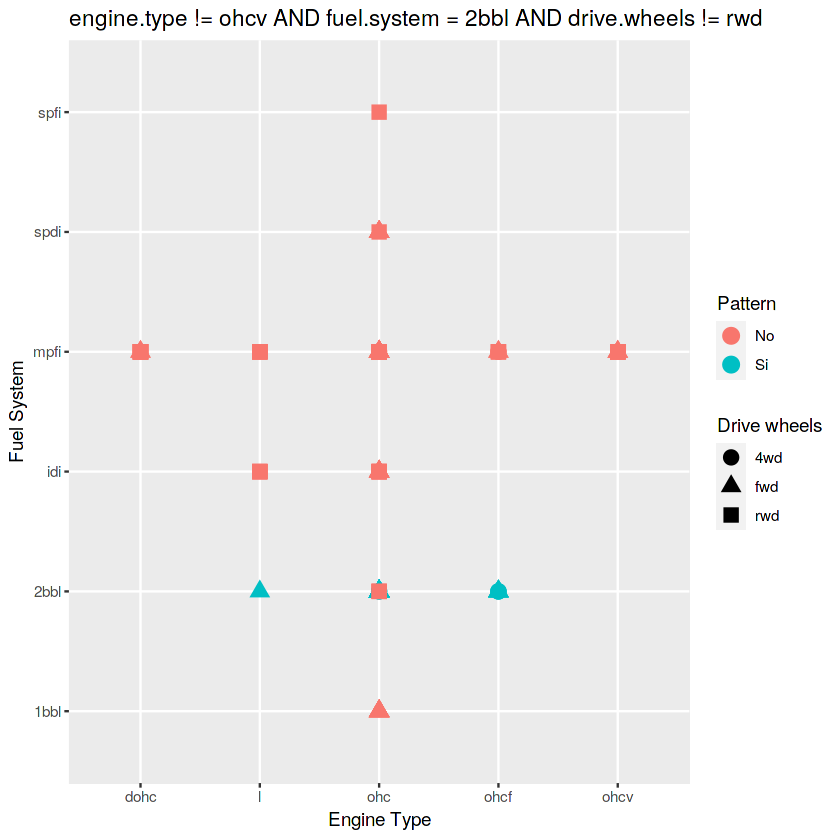

In [7]:
# 3 Item
auto$pattern <- ifelse(auto$engine.type != 'ohcv' & auto$fuel.system == '2bbl' & auto$drive.wheels != 'rwd', "Si", 'No')
ggplot(auto, aes(x = engine.type , y =fuel.system, col = pattern, shape = drive.wheels)) + 
geom_point(size = 4, alpha = 1) + 
  ggtitle("engine.type != ohcv AND fuel.system = 2bbl AND drive.wheels != rwd")+
labs(y = "Fuel System",color = "Pattern", shape = "Drive wheels", x = "Engine Type")

Warning message:
“Using size for a discrete variable is not advised.”


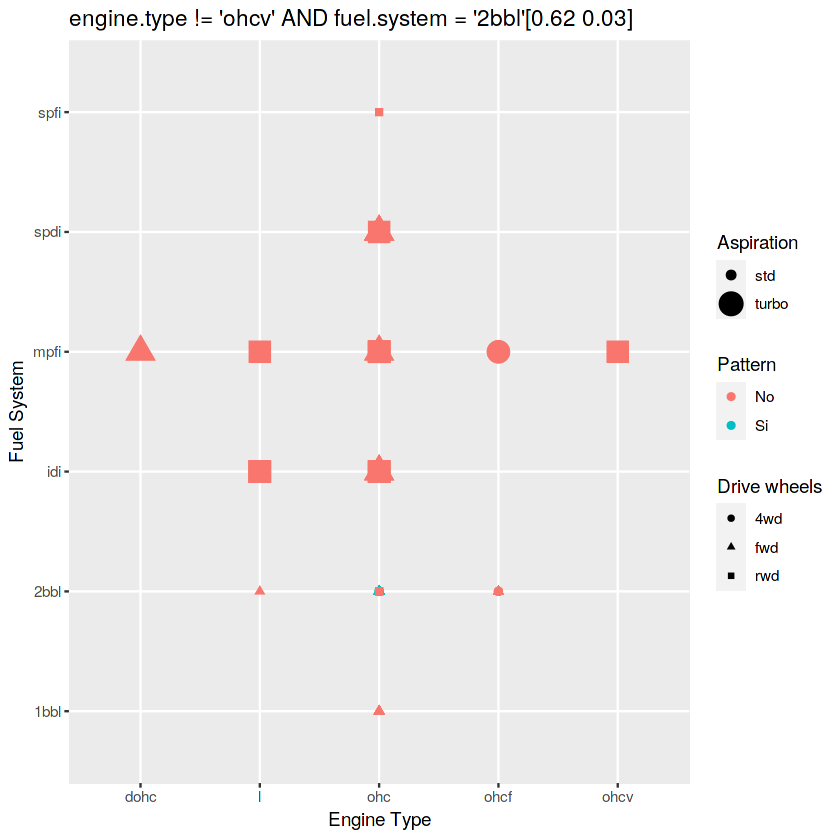

In [8]:
# 4 Item
auto$pattern <- ifelse(auto$aspiration == 'std' & auto$drive.wheels != 'rwd' & auto$engine.type == 'ohc' & auto$fuel.system == '2bbl', "Si", 'No')
ggplot(auto, aes(x = engine.type , y =fuel.system, shape = drive.wheels, col = pattern, size = aspiration)) + 
geom_point( alpha = 1) + 
  ggtitle("engine.type != 'ohcv' AND fuel.system = '2bbl'[0.62 0.03]")+
labs(y = "Fuel System",color = "Pattern", shape = "Drive wheels", x = "Engine Type", size="Aspiration")

**Numerical and Categorical items**

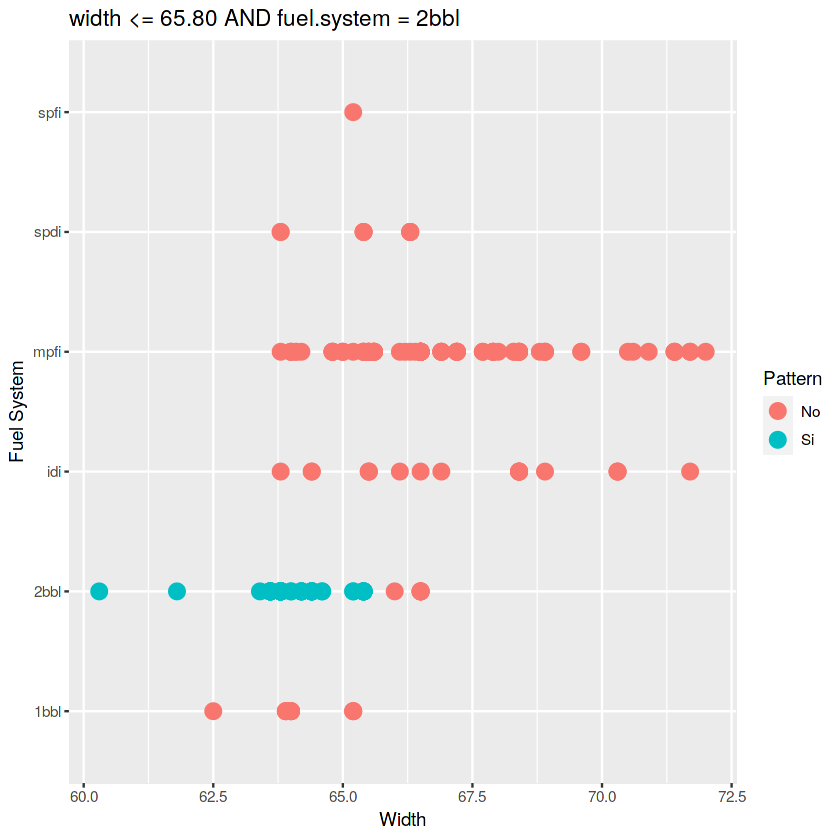

In [9]:
# 1 Item
auto$pattern <- ifelse(auto$width <= 65.80 & auto$fuel.system == '2bbl', "Si", 'No')
ggplot(auto, aes(x = width , y =fuel.system, col = pattern)) + 
geom_point(size = 4, alpha = 1) + 
  ggtitle("width <= 65.80 AND fuel.system = 2bbl")+
labs(y = "Fuel System",color = "Pattern", x = "Width")

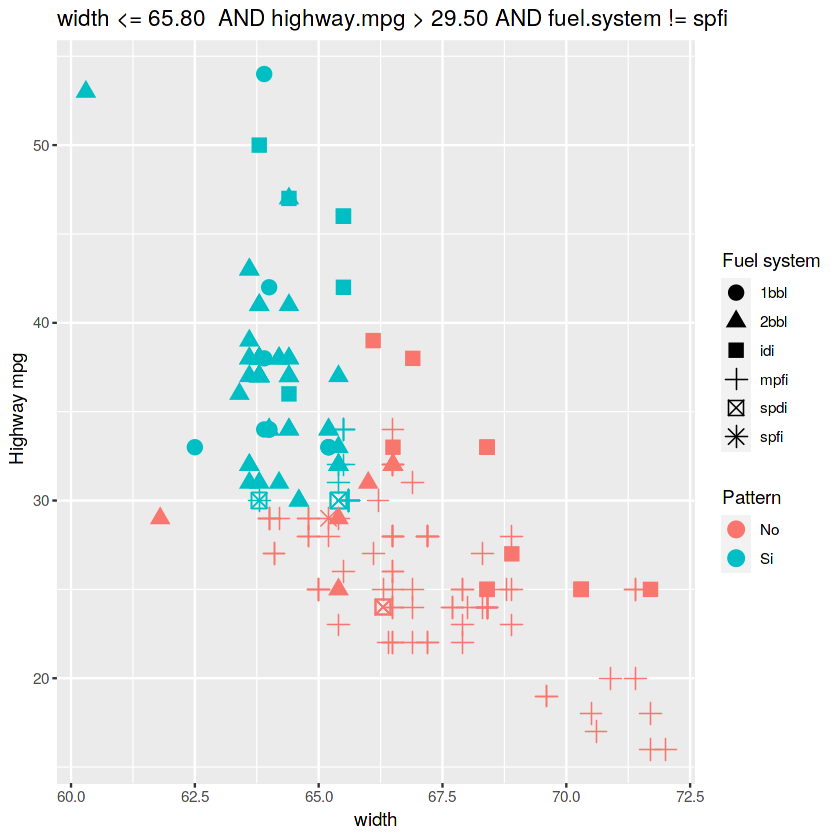

In [10]:
# 2 Item
auto$pattern <- ifelse( auto$width <= 65.80 & auto$highway.mpg > 29.50 & auto$fuel.system != 'spfi', "Si", "No")
ggplot(auto, aes(x = width , y = highway.mpg, shape = fuel.system, col = pattern)) + 
geom_point(size = 4, alpha = 1) + 
  ggtitle("width <= 65.80  AND highway.mpg > 29.50 AND fuel.system != spfi")+
labs(x = "width" , y =" Highway mpg", shape = "Fuel system", col = "Pattern")

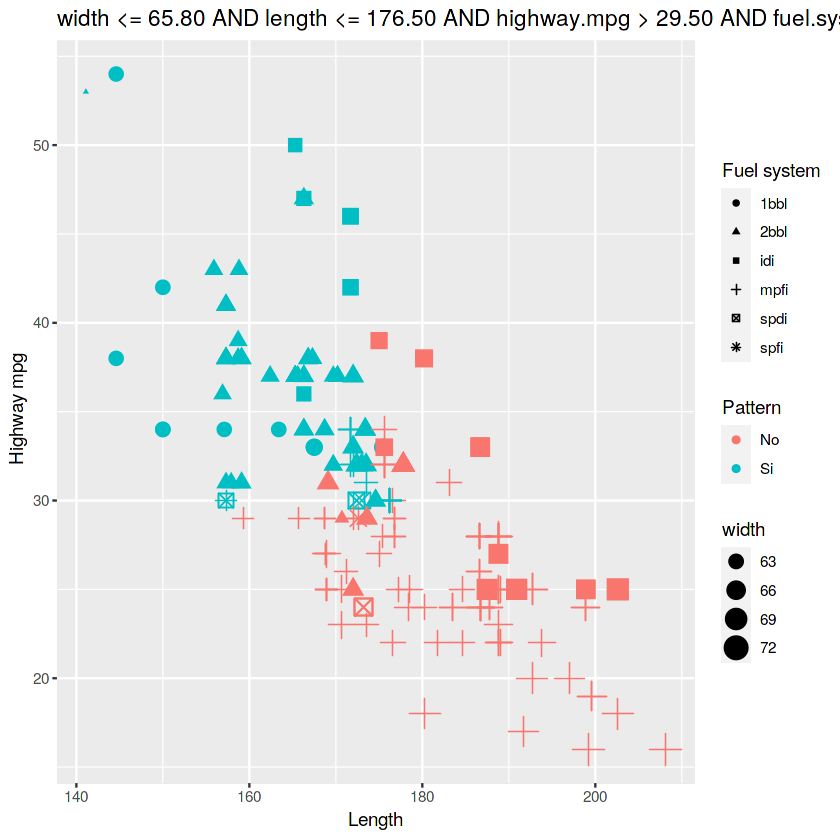

In [11]:
# 3 Item
auto$pattern <- ifelse(auto$length <= 176.50 & auto$width <= 65.80 & auto$highway.mpg > 29.50 & auto$fuel.system != 'spfi', "Si", "No")
ggplot(auto, aes(x = length , y = highway.mpg, shape = fuel.system, col = pattern, size = width)) + 
geom_point( alpha = 1) + 
  ggtitle("width <= 65.80 AND length <= 176.50 AND highway.mpg > 29.50 AND fuel.system != spfi")+
labs(x = "Length" , y =" Highway mpg", shape = "Fuel system", col = "Pattern", size = "width")

In [ ]:
# 4 Item
auto$pattern <- ifelse(auto$curb.weight <= 2544.00 & auto$length <= 176.50 & auto$width <= 65.80 & auto$highway.mpg > 29.50 & auto$fuel.system != 'spfi', "Si", "No")
ggplot(auto, aes(x = length , y = highway.mpg, shape = fuel.system, col = pattern, size = width, fill =curb.weight)) + 
geom_point( alpha = 1) + 
  ggtitle("curb.weight <= 2544.00 AND width <= 65.80 AND length <= 176.50 AND highway.mpg > 29.50 AND fuel.system != spfi")+
labs(x = "Length" , y =" Highway mpg", shape = "Fuel system", col = "Pattern", size = "width", fill ="curb.weight")